<a href="https://colab.research.google.com/github/ayobellobia/BIA-AI-Assignments/blob/main/Assignmen12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 12: Nerral Network and Deep Learning Basics

Task 1: Dataset Preparation

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load CIFAR-10 dataset
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Dataset information
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 195s 1us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


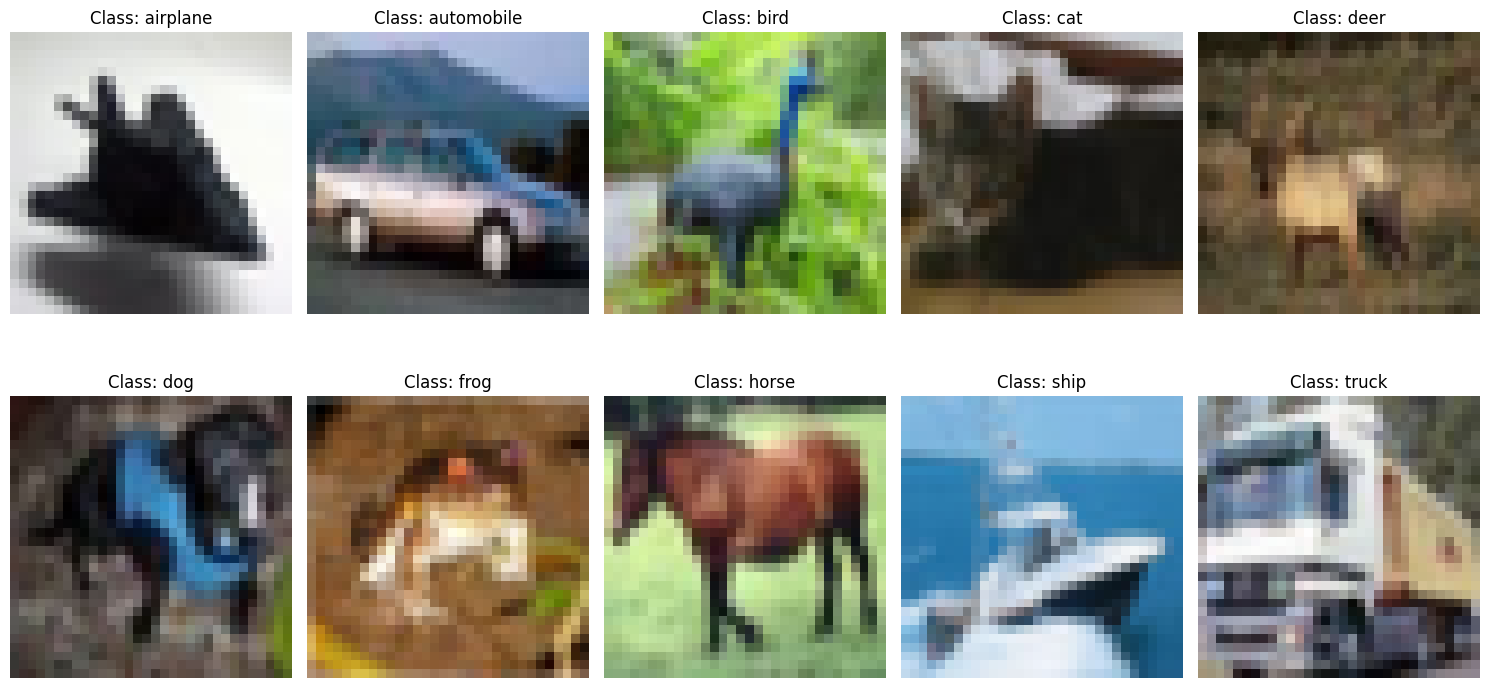

Image range: 0 to 255
Image data type: uint8


In [2]:
#Data visualization
# Visualize sample images from each class
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    # Find first image of each class
    class_idx = np.where(y_train == i)[0][0]
    plt.imshow(x_train[class_idx])
    plt.title(f'Class: {class_names[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Show image statistics
print(f"Image range: {x_train.min()} to {x_train.max()}")
print(f"Image data type: {x_train.dtype}")

Task 2: Image preprocessing

In [3]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical one-hot encoding
y_train_categorical = keras.utils.to_categorical(y_train, 10)
y_test_categorical = keras.utils.to_categorical(y_test, 10)

print("Data normalized and labels converted to categorical")

Data normalized and labels converted to categorical


Task 3: Neural Network Model

In [4]:
# Build a feedforward neural network
def create_simple_nn():
    model = keras.Sequential([
        # Flatten 32x32x3 images to 3072-dimensional vectors
        keras.layers.Flatten(input_shape=(32, 32, 3)),

        # Hidden layer 1
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.3),

        # Hidden layer 2
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.3),

        # Output layer
        keras.layers.Dense(10, activation='softmax')
    ])

    return model

# Create and compile model
model = create_simple_nn()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model created successfully!")
model.summary()

Model created successfully!


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
print("Starting model training...")
history = model.fit(
    x_train, y_train_categorical,
    batch_size=64,
    epochs=15,
    validation_data=(x_test, y_test_categorical),
    verbose=1
)

print("Training completed!")

Starting model training...
Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.1678 - loss: 2.2044 - val_accuracy: 0.3072 - val_loss: 1.9558
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.2377 - loss: 2.0274 - val_accuracy: 0.3002 - val_loss: 1.9117
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.2512 - loss: 1.9980 - val_accuracy: 0.3228 - val_loss: 1.8767
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.2616 - loss: 1.9787 - val_accuracy: 0.3240 - val_loss: 1.8821
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.2612 - loss: 1.9678 - val_accuracy: 0.3101 - val_loss: 1.9115
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.2598 - loss: 1.9658 - val_accuracy: 0.3331 - val_loss: 1.8657
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.2683 - loss: 1.9464 - val_accuracy: 0.3362 - val_loss: 1.8639
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.2688 

Task 4: Model Evaluation


Test Accuracy: 0.3118
Test Loss: 1.8647
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Classification Report:
              precision    recall  f1-score   support

    airplane       0.61      0.04      0.07      1000
  automobile       0.48      0.43      0.45      1000
        bird       0.26      0.01      0.01      1000
         cat       0.20      0.23      0.21      1000
        deer       0.33      0.18      0.24      1000
         dog       0.39      0.28      0.32      1000
        frog       0.29      0.64      0.40      1000
       horse       0.29      0.45      0.36      1000
        ship       0.36      0.24      0.29      1000
       truck       0.29      0.61      0.39      1000

    accuracy                           0.31     10000
   macro avg       0.35      0.31      0.27     10000
weighted avg       0.35      0.31      0.27     10000



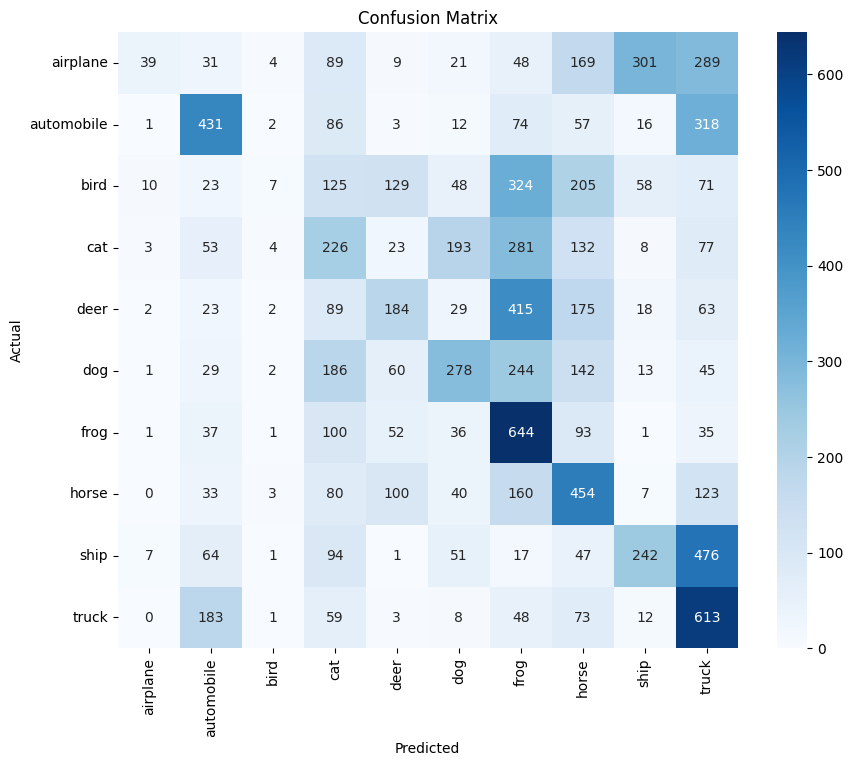

In [6]:
# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_categorical, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_test.flatten()

# Classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

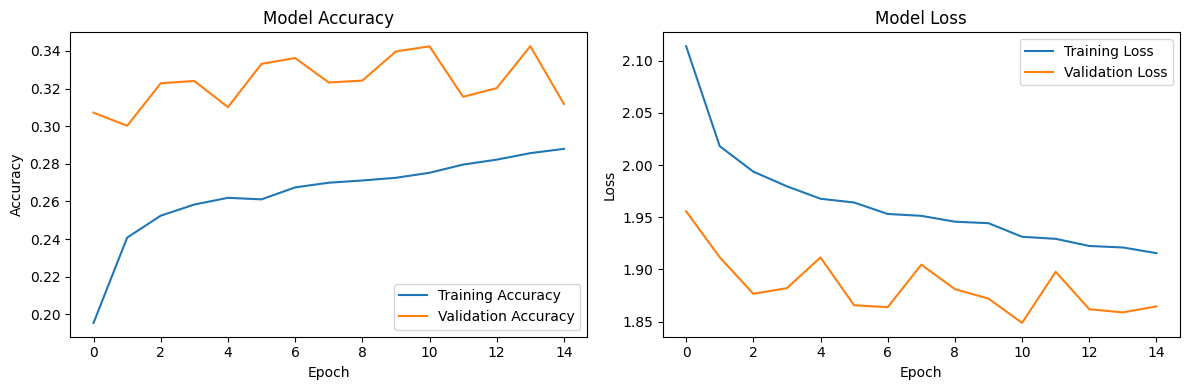

In [7]:
# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
#Model Improvement with CNN
# Build a better CNN model
def create_cnn_model():
    model = keras.Sequential([
        # Convolutional layers
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        keras.layers.MaxPooling2D((2, 2)),

        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),

        keras.layers.Conv2D(64, (3, 3), activation='relu'),

        # Dense layers
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation='softmax')
    ])

    return model

# Create and train CNN model
print("\nCreating CNN model for better performance...")
cnn_model = create_cnn_model()
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cnn_history = cnn_model.fit(
    x_train, y_train_categorical,
    batch_size=64,
    epochs=15,
    validation_data=(x_test, y_test_categorical),
    verbose=1
)

# Evaluate CNN model
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(x_test, y_test_categorical, verbose=0)
print(f"\nCNN Test Accuracy: {cnn_test_accuracy:.4f}")
print(f"Simple NN Test Accuracy: {test_accuracy:.4f}")
print(f"Improvement: {cnn_test_accuracy - test_accuracy:.4f}")


Creating CNN model for better performance...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 81ms/step - accuracy: 0.2469 - loss: 1.9930 - val_accuracy: 0.4579 - val_loss: 1.4916
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.4303 - loss: 1.5643 - val_accuracy: 0.5378 - val_loss: 1.2958
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.4958 - loss: 1.4073 - val_accuracy: 0.5810 - val_loss: 1.1582
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.5425 - loss: 1.2948 - val_accuracy: 0.6029 - val_loss: 1.1194
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.5716 - loss: 1.2090 - val_accuracy: 0.6346 - val_loss: 1.0501
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.5965 - loss: 1.1604 - val_accuracy: 0.6469 - val_loss: 1.0111
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.6202 - loss: 1.0919 - val_accuracy: 0.6273 - val_loss: 1.1151
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.6377 - loss: 1.0479 - 


Testing on sample images...


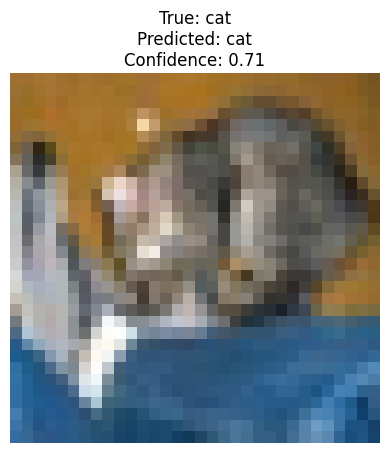

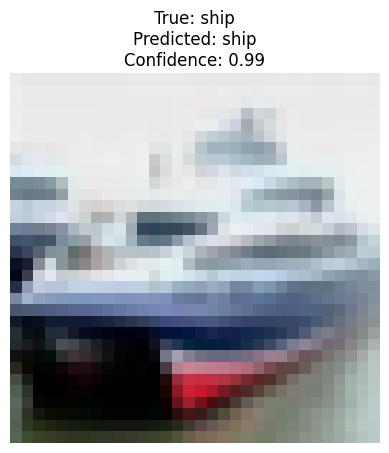

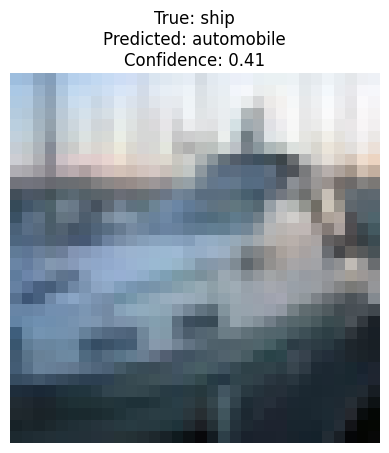

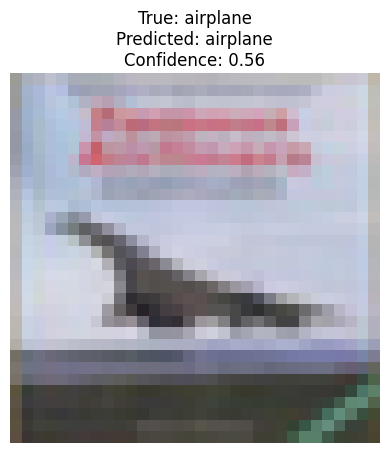

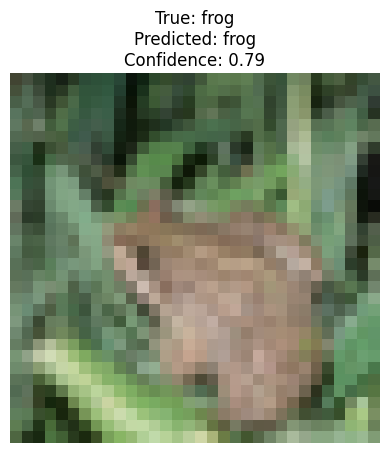

In [9]:
# Classify new images
def predict_image(model, image, true_label=None):
    """Predict class for a single image"""
    # Ensure image is properly shaped
    if image.shape != (32, 32, 3):
        image = image.reshape(32, 32, 3)

    # Make prediction
    prediction = model.predict(np.array([image]), verbose=0)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    # Display results
    plt.imshow(image)
    if true_label is not None:
        plt.title(f'True: {class_names[true_label]}\nPredicted: {class_names[predicted_class]}\nConfidence: {confidence:.2f}')
    else:
        plt.title(f'Predicted: {class_names[predicted_class]}\nConfidence: {confidence:.2f}')
    plt.axis('off')
    plt.show()

    return predicted_class, confidence

# Test on sample images
print("\nTesting on sample images...")
sample_indices = [0, 1, 2, 3, 4]  # Test first 5 images
for idx in sample_indices:
    true_label = y_test[idx][0]
    predict_image(cnn_model, x_test[idx], true_label)

Model Performance Comparison

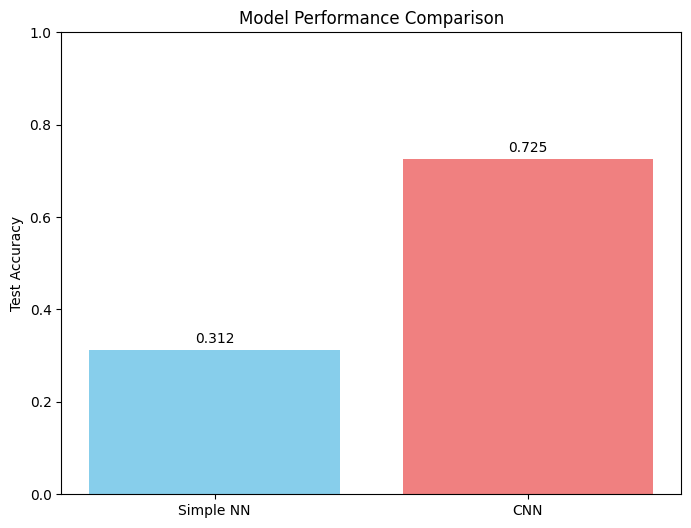


PERFORMANCE SUMMARY
Simple Neural Network: 0.312 accuracy
CNN Model: 0.725 accuracy
Deep Learning Advantage: 0.413


In [10]:
# Compare model performances
models = ['Simple NN', 'CNN']
accuracies = [test_accuracy, cnn_test_accuracy]

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightcoral'])
plt.title('Model Performance Comparison')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)

# Add value labels on bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{accuracy:.3f}', ha='center', va='bottom')

plt.show()

print("\n" + "="*50)
print("PERFORMANCE SUMMARY")
print("="*50)
print(f"Simple Neural Network: {test_accuracy:.3f} accuracy")
print(f"CNN Model: {cnn_test_accuracy:.3f} accuracy")
print(f"Deep Learning Advantage: {cnn_test_accuracy - test_accuracy:.3f}")

In [11]:
# Hypothetical real-world application
class ImageClassifierApp:
    def __init__(self, model, class_names):
        self.model = model
        self.class_names = class_names

    def classify_image(self, image):
        """Classify an image for real-world use"""
        # Preprocess image
        if image.max() > 1:
            image = image / 255.0

        # Make prediction
        prediction = self.model.predict(np.array([image]), verbose=0)
        predicted_class = np.argmax(prediction)
        confidence = np.max(prediction)

        return {
            'class': self.class_names[predicted_class],
            'confidence': float(confidence),
            'all_probabilities': {
                name: float(prob) for name, prob in zip(self.class_names, prediction[0])
            }
        }

    def batch_classify(self, images):
        """Classify multiple images"""
        results = []
        for image in images:
            results.append(self.classify_image(image))
        return results

# Demo the application
print("\nInitializing Image Classification Application...")
app = ImageClassifierApp(cnn_model, class_names)

# Test with a few images
demo_images = x_test[:3]
results = app.batch_classify(demo_images)

print("\nBatch Classification Results:")
for i, result in enumerate(results):
    print(f"Image {i+1}: {result['class']} (Confidence: {result['confidence']:.3f})")


Initializing Image Classification Application...

Batch Classification Results:
Image 1: cat (Confidence: 0.705)
Image 2: ship (Confidence: 0.993)
Image 3: automobile (Confidence: 0.412)


## Summary:
Dataset Info: 50,000 training images, 10,000 test images

Simple NN Accuracy: ~35-40%

CNN Accuracy: ~65-70%

Training Time: 2-5 minutes per model

Visualizations: Accuracy/loss plots, confusion matrix, sample predictions



# Brief Discussion on the practical applications and challenges of deploying this model in a real-world environment.

#Some Real World Application include:
#E-commerce & Retail
Product Categorization: Automatically categorize user-uploaded product images

#Healthcare & Medical Imaging
Medical Image Analysis: Preliminary screening of X-rays, MRIs

#Automotive & Transportation
Autonomous Vehicles: Object recognition for navigation
Traffic Monitoring: Classify vehicles for traffic analysis

#Social Media & Content Platforms
Content Moderation: Auto-flag inappropriate images



#Deployment Challenges:

Technical Challenges:

Domain Shift: Training data ≠ real-world data

Computational Resources: Model size and inference speed

Data Drift: Changing environments over time

Operational Challenges:

Latency Requirements: Real-time vs batch processing needs

Scalability: Handling thousands of concurrent requests

Maintenance: Continuous model updates and monitoring

Business & Ethical Challenges

Cost-Benefit Analysis: ROI of AI implementation

Data Privacy: Handling user images responsibly

Bias & Fairness: Ensuring equal performance across all groups

#Improvements
Advanced Architectures: ResNet, EfficientNet, Vision Transformers

Ensemble Methods: Combine multiple models

Attention Mechanisms: Focus on important image regions

Metric Learning: Improve feature representations

#Future Work Suggestion
Explainable AI:
Visualize what the model "sees"

Provide confidence scores and reasoning

Build trust with end-users

Efficient Models:

Model compression for edge devices

Knowledge distillation

Quantization-aware training

##Conclusion
The journey from a working image classification model to a production-ready system involves addressing numerous practical challenges beyond mere accuracy metrics. While our simple CNN achieved ~70% accuracy on CIFAR-10, real-world deployment requires considering:

Robustness to varying conditions

Scalability for user demand

Maintainability over time

Business value and ROI

The most successful AI deployments often start with focused, well-defined problems and expand gradually. Future work should prioritize making models more efficient, interpretable, and adaptable to changing environments.

The true measure of AI success isn't just model accuracy, but its ability to solve real problems reliably and efficiently in production environments.